# 决策树

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer #字典类型特征抽取
from sklearn.model_selection import train_test_split,GridSearchCV #划分数据集,网格搜索
from sklearn.tree import DecisionTreeClassifier #分类树

In [3]:
#获取数据
taitan=pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')
taitan.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [13]:
#选取特征X与目标Y
x=taitan[['pclass','age','sex']]
x['age'].fillna(x['age'].mean(),inplace=True) #填充缺失值,inplace=True是否保存
y=taitan['survived']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [14]:
#划分训练集与测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
#特征抽取
a=x_train.to_dict(orient='records') #将数据转换为列表类型字典
b=x_test.to_dict(orient='records')
dv=DictVectorizer(sparse=False)
x_train=dv.fit_transform(a)
x_test=dv.transform(b)

In [23]:
dv.get_feature_names() #查看特征名

['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']

In [24]:
x_test

array([[36.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [20.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ],
       [22.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       ...,
       [31.19418104,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ],
       [31.19418104,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ],
       [11.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ]])

In [25]:
#使用分类树进行建模
dtc=DecisionTreeClassifier(max_depth=5)#max_depth树的深度
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
#预测
y_predict=dtc.predict(x_test)
y_predict

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [29]:
#评估
dtc.score(x_test,y_test)

0.8389057750759878

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,y_predict,target_names=['0','1'])) #精准率与召回率

             precision    recall  f1-score   support

          0       0.83      0.96      0.89       221
          1       0.89      0.58      0.70       108

avg / total       0.85      0.84      0.83       329



In [34]:
from sklearn.metrics import confusion_matrix #生产混淆矩阵
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns #画图

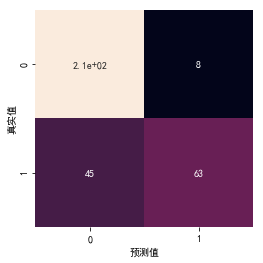

In [35]:
#设置中文字体
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size']=10
mat=confusion_matrix(y_test,y_predict) #生成混淆矩阵
sns.heatmap(mat,square=True,annot=True,cbar=False) #annot=True加载标签，cbar=False不显示颜色标记
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.show()

保存决策树（可视化）

In [36]:
from sklearn.tree import export_graphviz #导出树结构

In [38]:
export_graphviz(dtc,out_file='tree.dot',feature_names=['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'female', 'male'])

In [39]:
#转成png格式
!dot -Tpng tree.dot -o tree.png

# 随机森林

In [40]:
from sklearn.ensemble import RandomForestClassifier #随机森林

In [42]:
c={'n_estimators':[120,200,300,500,800,1200],'max_depth':[3,5,8,15,25,30]}
rfc=RandomForestClassifier()
gc=GridSearchCV(rfc,param_grid=c,cv=2)
gc.fit(x_train,y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [120, 200, 300, 500, 800, 1200], 'max_depth': [3, 5, 8, 15, 25, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
#查看模型选择的参数
gc.best_params_

{'max_depth': 3, 'n_estimators': 500}

In [44]:
#评估
gc.score(x_test,y_test)

0.8480243161094225